# **菊安酱与菜菜的Python机器学习可视化**

### <font color='bule'>第四期  分布图：20连续变量直方图 & 21分类变量直方图


**注意：本篇中可能遇见无法在matpotlib和seaborn中显示中文或者负号的问题**  
如果你遇见了，请参考链接，可永久解决中文和负号问题：https://www.jianshu.com/p/914b5f4ce6bf  
或者你也可以在每次需要负号和中文的时候执行下面的代码来避免中文或负号显示不出来：

In [1]:
# import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif']=['Simhei'] #显示中文
# plt.rcParams['axes.unicode_minus']=False   #显示负号

## **分布图 Distribution**

分布图是python机器学习中比较常见的一种图形    
如果你想要查看多组数据之间的分布有什么不同的时候，分布图就是一个很好的选择。   
你可以用分布图查看一个特征中不同种类之间的分布关系，也可以查看多个特征之间的分布    

典型的分布图有：直方图、密度图、箱型图……

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week4%20Distribution/%E5%88%86%E5%B8%83%E5%9B%BE.png'>

### 我们什么时候需要分布图呢？  
1. 数据探索 & 数据解读：<br>
>探索数据关系，了解数据分布状况，为决策提供依据<br>
2. 数据报告 & 学术研究：<br>
>纵向对比：同一个特征中不同类别之间的分布状况<br>
>横向对比：不同特征之间的分布状况


### <font color=bule> 20/50 连续变量直方图（Histogram for Continuous Variable）

直方图是我们探索数据时常用的一种方法，它可以显示给定变量的频率分布，非常直观。     
一般的直方图对于单变量来说非常的友好，能够清晰的表达出变量的分布状况。     
但是对于多变量来说，一般的直方图就没办法清楚的传递信息，解决方案之一就是堆积直方图（如下图所示）。     
下图基于分类变量对频率条进行分组，可以更好地了解连续变量和分类变量。   

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week4%20Distribution/%E8%BF%9E%E7%BB%AD%E5%8F%98%E9%87%8F%E7%9B%B4%E6%96%B9%E5%9B%BE.png" width=700>

- 横坐标：发动机排量   
- 纵坐标：频数   
- 图例：汽车类型   

### 1.导入绘图的包

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#如果用jupyter notebook则需要这行代码让你的图像显示，如果是jupyterlab则不需要

plt.rcParams['font.sans-serif']=['Simhei'] #显示中文
plt.rcParams['axes.unicode_minus']=False   #显示负号

### 2.认识绘制连续变量直方图的函数

**plt.hist**    

重要参数：    
>'x':绘图数据     
>'bins=None'：控制直方图的分组数（即条形的个数）   
>'range=None'：直方图横坐标的范围     
>'density=None'：如果设定True,则纵坐标表示为概率密度的值    
>'weights=None'：设定每个数据的权重，长度与x相同    
>'cumulative=False'：如果设定为True，则直方图累积显示   
>"histtype='bar'"：绘制直方图的类型,默认为'bar'        
>> 'bar':传统的直方图   
>> 'barstacked':堆叠直方图   
>> 'step':默认未填充的线图   
>> 'stepfilled':默认填充的线图    

>"align='mid'"：直方图对齐方式，可选项{'left'，'mid'，'right'}   
>"orientation='vertical'":控制直方图的方向，{'horizontal', 'vertical'}   
>'color=None':直方图的颜色    
>'label=None'：标签    
>'stacked=False'：控制堆叠参数   

返回结果：     
> n：直方图纵坐标的值    
> bins:直方图箱体    
> patches：patches对象   

In [9]:
plt.hist?

Signature:
plt.hist(
    ['x', 'bins=None', 'range=None', 'density=None', 'weights=None', 'cumulative=False', 'bottom=None', "histtype='bar'", "align='mid'", "orientation='vertical'", 'rwidth=None', 'log=False', 'color=None', 'label=None', 'stacked=False', 'normed=None', '*', 'data=None', '**kwargs'],
)
Docstring:
Plot a histogram.

Compute and draw the histogram of *x*. The return value is a
tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
[*patches0*, *patches1*,...]) if the input contains multiple
data.

Multiple data can be provided via *x* as a list of datasets
of potentially different length ([*x0*, *x1*, ...]), or as
a 2-D ndarray in which each column is a dataset.  Note that
the ndarray form is transposed relative to the list form.

Masked arrays are not supported at present.

Parameters
----------
x : (n,) array or sequence of (n,) arrays
    Input values, this takes either a single array or a sequence of
    arrays which are not required to be of the same length.

### 3.导入绘图数据集

In [10]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

In [11]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [12]:
df.shape

(234, 11)

In [13]:
name = ["汽车制造商","型号名称","发动机排量(L)","制造年份","气缸数量","手动/自动"
              ,"驱动类型","城市里程/加仑","公路里程/加仑","汽油种类","车辆类型"]

In [14]:
[*zip(df.columns,name)]

[('manufacturer', '汽车制造商'),
 ('model', '型号名称'),
 ('displ', '发动机排量(L)'),
 ('year', '制造年份'),
 ('cyl', '气缸数量'),
 ('trans', '手动/自动'),
 ('drv', '驱动类型'),
 ('cty', '城市里程/加仑'),
 ('hwy', '公路里程/加仑'),
 ('fl', '汽油种类'),
 ('class', '车辆类型')]

**绘制简单的直方图**

(array([43., 39., 32., 23., 30., 29., 13., 19.,  4.,  2.]),
 array([1.6 , 2.14, 2.68, 3.22, 3.76, 4.3 , 4.84, 5.38, 5.92, 6.46, 7.  ]),
 <a list of 10 Patch objects>)

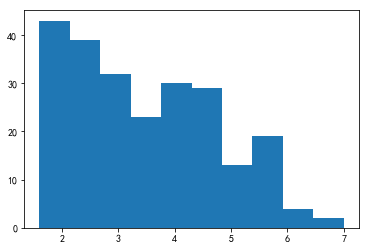

In [31]:
plt.hist(df.displ
         #,bins=5
         #,range=(df.displ.min(),df.displ.max()) #改变横坐标的范围
         #,range=(2,5)
         #,density=True   #将纵坐标变成密度概率
         #,cumulative=True
         #,histtype='stepfilled'  #可选项：'bar'/'barstacked'/'step'/'stepfilled'
         #,align='left'       #可选项：'mid'/'left'/'right'
         #,orientation='horizontal' #可选项:'horizontal'/'vertical'
         #,stacked=True
        )

### 4.绘制连续变量直方图

根据目标图形可以看出，横坐标需要的是特征displ，还需要将class进行分组求和，得到每一种类车的数量

In [32]:
df.loc[:,['displ','class']]

,displ,class
0,1.8,compact
1,1.8,compact
2,2.0,compact
3,2.0,compact
4,2.8,compact
5,2.8,compact
6,3.1,compact
7,1.8,compact
8,1.8,compact
9,2.0,compact


In [33]:
#数据处理
df_agg = df.loc[:,['displ','class']].groupby('class')

In [34]:
df_agg

In [35]:
for i,df0 in df_agg:
    print(i,df0)

2seater     displ    class
23    5.7  2seater
24    5.7  2seater
25    6.2  2seater
26    6.2  2seater
27    7.0  2seater
compact      displ    class
0      1.8  compact
1      1.8  compact
2      2.0  compact
3      2.0  compact
4      2.8  compact
5      2.8  compact
6      3.1  compact
7      1.8  compact
8      1.8  compact
9      2.0  compact
10     2.0  compact
11     2.8  compact
12     2.8  compact
13     3.1  compact
14     3.1  compact
141    2.4  compact
142    2.4  compact
169    2.5  compact
170    2.5  compact
171    2.5  compact
172    2.5  compact
186    2.2  compact
187    2.2  compact
188    2.4  compact
189    2.4  compact
190    3.0  compact
191    3.0  compact
192    3.3  compact
193    1.8  compact
194    1.8  compact
195    1.8  compact
196    1.8  compact
197    1.8  compact
207    2.0  compact
208    2.0  compact
209    2.0  compact
210    2.0  compact
211    2.8  compact
212    1.9  compact
213    2.0  compact
214    2.0  compact
215    2.0  compact
216    2.0

In [36]:
df0['displ'].values.tolist()

[5.3,
 5.3,
 5.3,
 5.7,
 6.0,
 5.3,
 5.3,
 5.7,
 6.5,
 3.9,
 4.7,
 4.7,
 4.7,
 5.2,
 5.7,
 5.9,
 4.6,
 5.4,
 5.4,
 4.0,
 4.0,
 4.0,
 4.0,
 4.6,
 5.0,
 3.0,
 3.7,
 4.0,
 4.7,
 4.7,
 4.7,
 5.7,
 6.1,
 4.0,
 4.2,
 4.4,
 4.6,
 5.4,
 5.4,
 5.4,
 4.0,
 4.0,
 4.6,
 5.0,
 3.3,
 3.3,
 4.0,
 5.6,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.7,
 2.7,
 3.4,
 3.4,
 4.0,
 4.7,
 4.7,
 5.7]

In [37]:
#提取出每一款车型的发动机排量
vals =[df0['displ'].values.tolist() for i,df0 in df_agg]

In [38]:
vals

[[5.7, 5.7, 6.2, 6.2, 7.0],
 [1.8,
  1.8,
  2.0,
  2.0,
  2.8,
  2.8,
  3.1,
  1.8,
  1.8,
  2.0,
  2.0,
  2.8,
  2.8,
  3.1,
  3.1,
  2.4,
  2.4,
  2.5,
  2.5,
  2.5,
  2.5,
  2.2,
  2.2,
  2.4,
  2.4,
  3.0,
  3.0,
  3.3,
  1.8,
  1.8,
  1.8,
  1.8,
  1.8,
  2.0,
  2.0,
  2.0,
  2.0,
  2.8,
  1.9,
  2.0,
  2.0,
  2.0,
  2.0,
  2.5,
  2.5,
  2.8,
  2.8],
 [2.8,
  3.1,
  4.2,
  2.4,
  2.4,
  3.1,
  3.5,
  3.6,
  2.4,
  2.4,
  2.4,
  2.4,
  2.5,
  2.5,
  3.3,
  2.5,
  2.5,
  3.5,
  3.5,
  3.0,
  3.0,
  3.5,
  3.1,
  3.8,
  3.8,
  3.8,
  5.3,
  2.2,
  2.2,
  2.4,
  2.4,
  3.0,
  3.0,
  3.5,
  1.8,
  1.8,
  2.0,
  2.0,
  2.8,
  2.8,
  3.6],
 [2.4, 3.0, 3.3, 3.3, 3.3, 3.3, 3.3, 3.8, 3.8, 3.8, 4.0],
 [3.7,
  3.7,
  3.9,
  3.9,
  4.7,
  4.7,
  4.7,
  5.2,
  5.2,
  4.7,
  4.7,
  4.7,
  4.7,
  4.7,
  4.7,
  5.2,
  5.2,
  5.7,
  5.9,
  4.2,
  4.2,
  4.6,
  4.6,
  4.6,
  5.4,
  5.4,
  2.7,
  2.7,
  2.7,
  3.4,
  3.4,
  4.0,
  4.0],
 [3.8,
  3.8,
  4.0,
  4.0,
  4.6,
  4.6,
  4.6,
  4.6,
  5.4,
 

绘制连续变量直方图

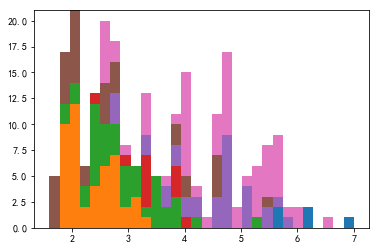

In [39]:
plt.hist(vals,30,stacked=True);

添加装饰

In [43]:
bins

array([1.6 , 1.78, 1.96, 2.14, 2.32, 2.5 , 2.68, 2.86, 3.04, 3.22, 3.4 ,
       3.58, 3.76, 3.94, 4.12, 4.3 , 4.48, 4.66, 4.84, 5.02, 5.2 , 5.38,
       5.56, 5.74, 5.92, 6.1 , 6.28, 6.46, 6.64, 6.82, 7.  ])

In [42]:
len(bins)

31

In [44]:
bins[::3]

array([1.6 , 2.14, 2.68, 3.22, 3.76, 4.3 , 4.84, 5.38, 5.92, 6.46, 7.  ])

In [45]:
[round(b,1) for b in bins[::3]]

[1.6, 2.1, 2.7, 3.2, 3.8, 4.3, 4.8, 5.4, 5.9, 6.5, 7.0]

In [46]:
np.unique(df['class'])

array(['2seater', 'compact', 'midsize', 'minivan', 'pickup', 'subcompact',
       'suv'], dtype=object)

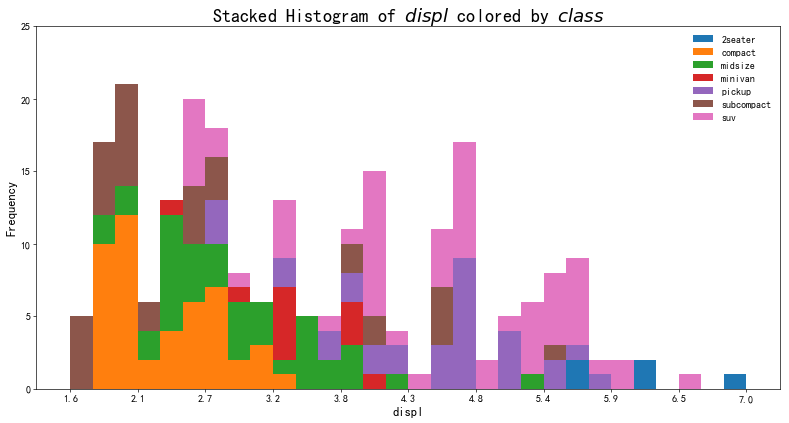

In [49]:
plt.figure(figsize=(16,8),dpi=60) #创建画布
n,bins,patches = plt.hist(vals,30,stacked=True) #绘制堆叠直方图

#添加装饰
plt.title('Stacked Histogram of $displ$ colored by $class$',fontsize=22) #添加标题
plt.xlabel('displ',fontsize=15) #X轴的标题
plt.ylabel('Frequency',fontsize=15) #Y轴标题
plt.xticks(bins[::3],[round(b,1) for b in bins[::3]],fontsize=12) #设定X轴的刻度标签
plt.yticks(fontsize=12) #设定Y轴刻度大小
plt.ylim(0,25)#设定Y轴刻度范围
plt.legend(np.unique(df['class']),frameon=False,fontsize=12);

### 5.源码及图像解读

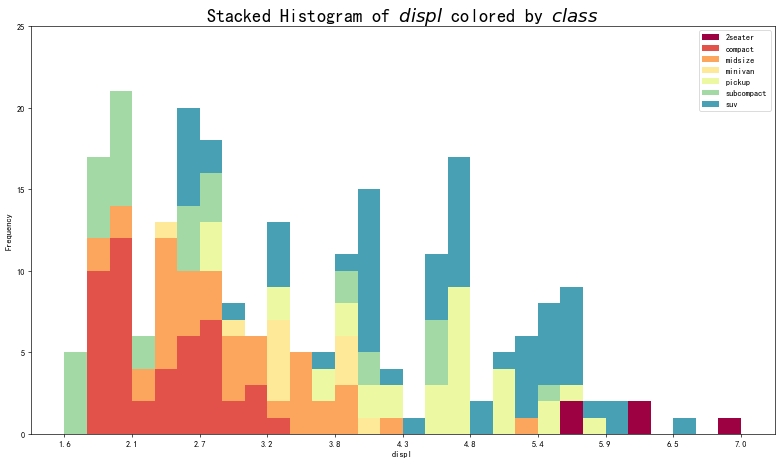

In [56]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare data
x_var = 'displ' #横坐标所需特征         
groupby_var = 'class' #分类变量
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var) #根据分类变量将所需数据分组
vals = [df[x_var].values.tolist() for i, df in df_agg] #提取出每一组中的数据

# Draw
plt.figure(figsize=(16,9), dpi= 60)#创建画布并设定画布大小
#colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]  #生成颜色列表
colors = [plt.cm.Spectral(i/float(len(vals))) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)]) #绘制直方图

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])}) #添加图例
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22) #添加标题
plt.xlabel(x_var)   #添加 X轴标题
plt.ylabel("Frequency")#添加 Y轴标题
plt.ylim(0, 25) #设定Y轴刻度范围
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])#设定 X轴刻度
plt.show() #本地显示图形

In [50]:
plt.cm.Spectral?

Signature:      plt.cm.Spectral(X, alpha=None, bytes=False)
Type:           LinearSegmentedColormap
String form:    <matplotlib.colors.LinearSegmentedColormap object at 0x000001D007C62048>
File:           d:\anaconda3\lib\site-packages\matplotlib\colors.py
Docstring:     
Colormap objects based on lookup tables using linear segments.

The lookup table is generated using linear interpolation for each
primary color, with the 0-1 domain divided into any number of
segments.
Init docstring:
Create color map from linear mapping segments

segmentdata argument is a dictionary with a red, green and blue
entries. Each entry should be a list of *x*, *y0*, *y1* tuples,
forming rows in a table. Entries for alpha are optional.

Example: suppose you want red to increase from 0 to 1 over
the bottom half, green to do the same over the middle half,
and blue over the top half.  Then you would use::

    cdict = {'red':   [(0.0,  0.0, 0.0),
                       (0.5,  1.0, 1.0),
                       (

In [51]:
plt.cm.Spectral(1) #RGBA色彩空间：红绿蓝+alpha

(0.6280661284121491, 0.013302575932333718, 0.26082276047673975, 1.0)

In [53]:
len(vals)

7

In [52]:
[plt.cm.Spectral(i/float(len(vals))) for i in range(len(vals))]

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.8853517877739331, 0.3190311418685121, 0.29042675893886966, 1.0),
 (0.9873125720876587, 0.6473663975394078, 0.3642445213379469, 1.0),
 (0.9971549404075356, 0.9118031526336025, 0.6010765090349866, 1.0),
 (0.9288735101883892, 0.9715494040753557, 0.6380622837370243, 1.0),
 (0.6334486735870821, 0.8521337946943485, 0.6436755094194541, 1.0),
 (0.2800461361014994, 0.6269896193771626, 0.7024221453287197, 1.0)]

In [54]:
[plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.9139561707035756, 0.36239907727797, 0.27935409457900806, 1.0),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0),
 (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 (0.3280276816608997, 0.6805074971164936, 0.6802768166089965, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

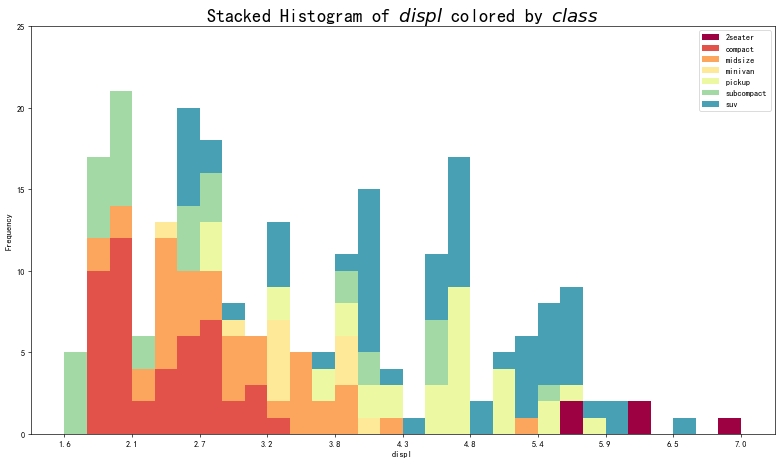

In [105]:
# Prepare data
x_var = 'displ' #横坐标所需特征         
groupby_var = 'class' #分类变量
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var) 
vals = [df[x_var].values.tolist() for i, df in df_agg] 

# Draw
plt.figure(figsize=(16,9), dpi= 60)
colors = [plt.cm.Spectral(i/float(len(vals))) for i in range(len(vals))]  #生成颜色列表
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)]) 

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])}) 
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.show()

**图形解读**

- 从这样一个堆积直方图中，我们能够看出每一种类型车的排量基本处于什么样的位置
- 还可以看出同一个排量下，有多少种类的车，每种车的占比如何   
- 对于2seater两座车来说，基本上全部都是大排量
- compact紧凑型车的排量基本上都比较小
- 此外，我们还可以看出大部分类型车的排量都在5以下

### <font color=bule> 21/50 分类变量直方图（Histogram for Categorical Variable）

分类变量直方图与连续变量直方图非常的类似。它也可以显示每个变量的频率分布。   
通过对条形图的不同着色，可以将分类变量与表示颜色的另一种分类变量相关联。

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week4%20Distribution/%E5%88%86%E7%B1%BB%E5%8F%98%E9%87%8F%E7%9B%B4%E6%96%B9%E5%9B%BE.png' width=700>

- 横坐标：汽车制造商manufacturer   
- 纵坐标：频数  
- 图例：汽车种类class

In [57]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv") #导入数据集

In [58]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [66]:
{group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])}

{'2seater': (0.6196078431372549,
  0.00392156862745098,
  0.25882352941176473,
  1.0),
 'compact': (0.9139561707035756, 0.36239907727797, 0.27935409457900806, 1.0),
 'midsize': (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0),
 'minivan': (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0),
 'pickup': (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 'subcompact': (0.3280276816608997,
  0.6805074971164936,
  0.6802768166089965,
  1.0),
 'suv': (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)}

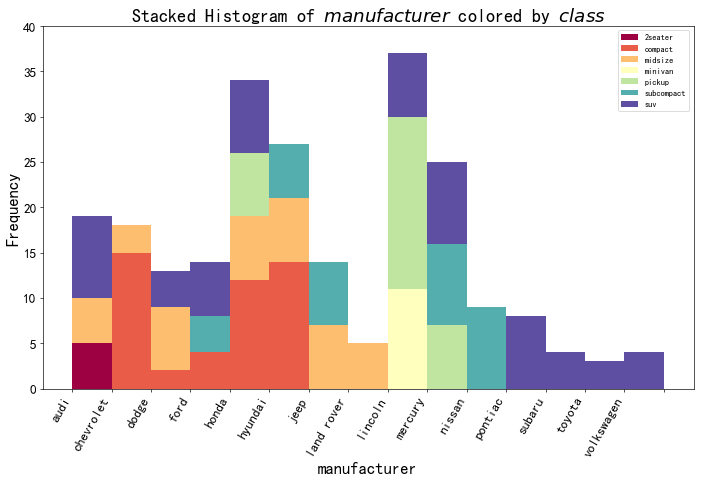

In [70]:
# Prepare data
x_var = 'manufacturer'   #X轴特征
groupby_var = 'class'    #分类标签（颜色标签）
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var) #根据颜色标签将X轴特征分组
vals = [df[x_var].values.tolist() for i, df in df_agg]  #提取出每组特征

# Draw
plt.figure(figsize=(14,8), dpi= 60) #创建画布
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]  #创建颜色列表
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)]) #绘制堆叠直方图

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])}) #添加图例
# plt.legend(np.unique(df[groupby_var]),frameon=False,fontsize=15)
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22) #添加标题
plt.xlabel(x_var,fontsize=20) #设定X轴标签
plt.ylabel("Frequency",fontsize=20) #设定Y轴标签
plt.ylim(0, 40) #设定Y轴刻度范围
plt.xticks(ticks=bins, labels=np.unique(df[x_var]).tolist(), rotation=60, horizontalalignment='right',fontsize=16) #设定X轴刻度标签
plt.yticks(fontsize=16)#设定Y轴刻度字体大小
plt.show() #本地显示

In [61]:
df[x_var].unique() #去重，与np.unique()作用相同

array(['audi', 'chevrolet', 'dodge', 'ford', 'honda', 'hyundai', 'jeep',
       'land rover', 'lincoln', 'mercury', 'nissan', 'pontiac', 'subaru',
       'toyota', 'volkswagen'], dtype=object)

In [62]:
np.unique(df[x_var])

array(['audi', 'chevrolet', 'dodge', 'ford', 'honda', 'hyundai', 'jeep',
       'land rover', 'lincoln', 'mercury', 'nissan', 'pontiac', 'subaru',
       'toyota', 'volkswagen'], dtype=object)

In [63]:
df[x_var].unique().__len__() #返回对象长度，与len()作用相同

15

In [64]:
len(df[x_var].unique())

15